In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation

In [2]:
df= pd.read_excel('Desktop/Learning Folder/python/DATASET/german_credit_data.xlsx', sheet_name='data')
print(f'Original shape of data {df.shape}')
df.head()

Original shape of data (1000, 10)


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [3]:
# dropping unnecessary column:
df.drop(df.columns[0], inplace=True, axis=1)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [5]:
# checking for missing values:
df.isna().sum()
print('NULL VALUES CHECKED')

# filling null values with most frequent values:
# filling savings account column using ffill method:
df['Saving accounts']= df['Saving accounts'].fillna(method='ffill').fillna('little')
print('SAVING ACCOUNTS COLUMNS FILLED')

# filling checking account column using ffill method:
df['Checking account']= df['Checking account'].fillna(method='ffill')
print('CHECKING ACCOUNTS COLUMNS FILLED')

NULL VALUES CHECKED
SAVING ACCOUNTS COLUMNS FILLED
CHECKING ACCOUNTS COLUMNS FILLED


In [6]:
# checking for unique values in each column:
print("Unique values in each categorical column:")
for col in df.select_dtypes(include=[object]):
    print(col,":", df[col].unique())

Unique values in each categorical column:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : ['little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [7]:
# standardizing all categorical columns:
print('Standardized catergorical columns')
for cols in df.select_dtypes(include=[object]):
    print(cols,':',df[cols].str.title())

Standardized catergorical columns
Sex : 0        Male
1      Female
2        Male
3        Male
4        Male
        ...  
995    Female
996      Male
997      Male
998      Male
999      Male
Name: Sex, Length: 1000, dtype: object
Housing : 0       Own
1       Own
2       Own
3      Free
4      Free
       ... 
995     Own
996     Own
997     Own
998    Free
999     Own
Name: Housing, Length: 1000, dtype: object
Saving accounts : 0        Little
1        Little
2        Little
3        Little
4        Little
         ...   
995      Little
996      Little
997      Little
998      Little
999    Moderate
Name: Saving accounts, Length: 1000, dtype: object
Checking account : 0        Little
1      Moderate
2      Moderate
3        Little
4        Little
         ...   
995      Little
996      Little
997      Little
998      Little
999    Moderate
Name: Checking account, Length: 1000, dtype: object
Purpose : 0                 Radio/Tv
1                 Radio/Tv
2                Education

# EDA

In [8]:
# plotting scatter to identify relationship b/w credit amount, duration, and age:
def scatters(data, h=None, pal='husl'):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

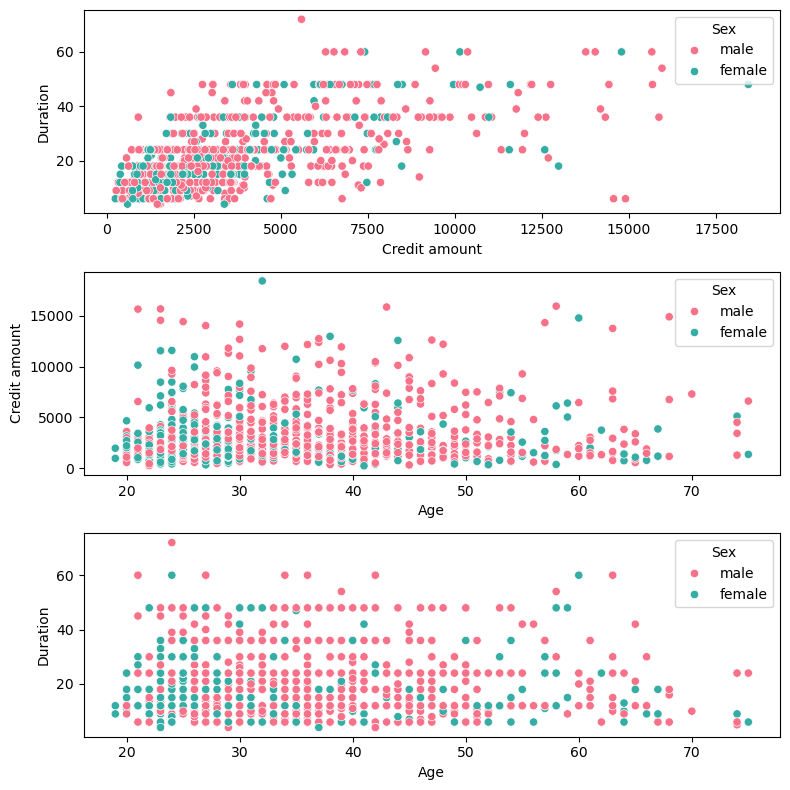

In [9]:
scatters(df, h="Sex")

The general impression is that women tend to be younger than men, however, the top plot shows that there is no clear 
difference between men and women in terms of amount and duration of the credit. From visual inspection, 
it seems that there is some positive correlation between duration and amount of credit, what makes sense.

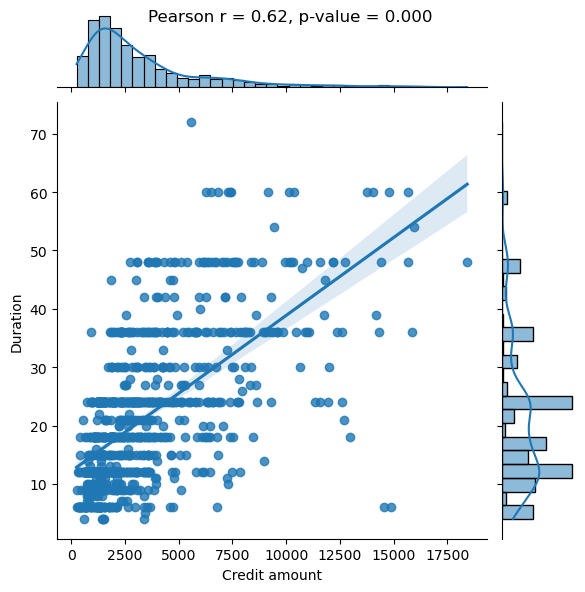

In [77]:
# linear correlation b/w credit amount and duration:
import scipy.stats as stats
r1 = sns.jointplot(x="Credit amount",y="Duration",data=df,kind="reg",height=6)
corr, p = stats.pearsonr(df["Credit amount"], df["Duration"])
plt.suptitle(f"Pearson r = {corr:.2f}, p-value = {p:.3f}")
plt.show()

The plot above shows a linear correlation with Pearson value of 0.62 and very small p-value. 
That make’s sense because usually, people take bigger credits for longer periods. 
Below I will analyse linear regression plots with various categorisations

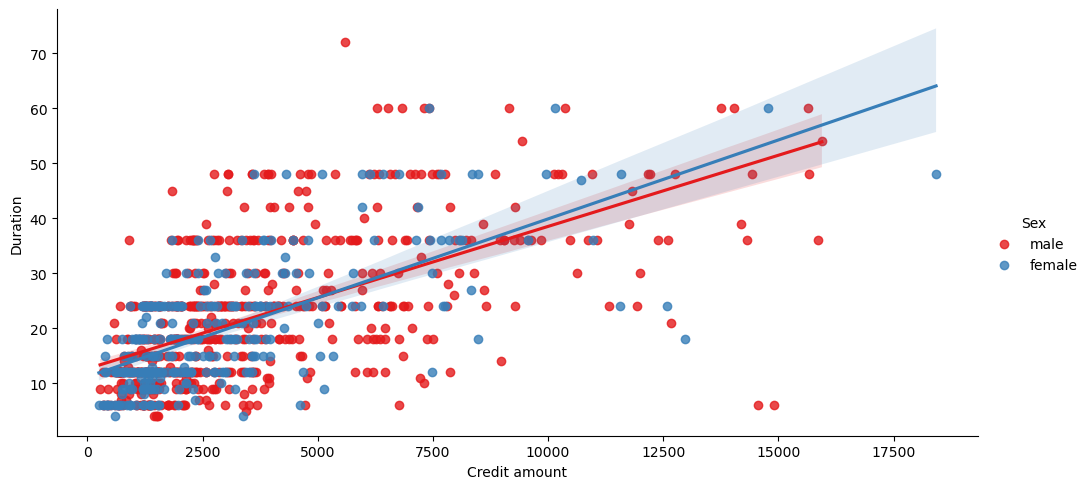

In [11]:
# showing if the differences in men and women credit amount by duration:
sns.lmplot(x="Credit amount",y="Duration", hue="Sex", data=df, palette="Set1", aspect=2)
plt.show()

The plot above indicates that there is no significant difference between men and women.

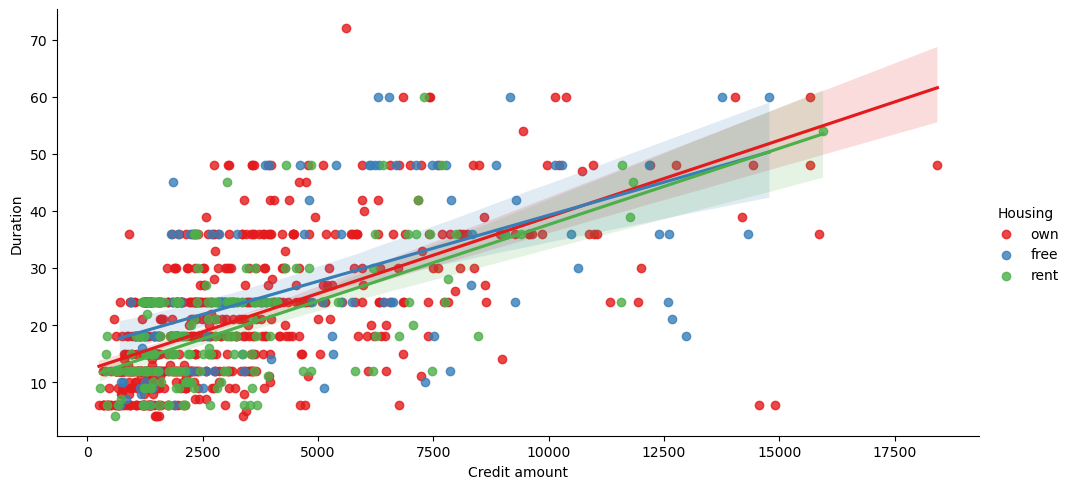

In [16]:
# showing if the differences in housing categories by credit amount and duration:
sns.lmplot(x="Credit amount",y="Duration", hue="Housing", data=df, palette="Set1", aspect=2)
plt.show()

The plot above shows similarly that there is no diference betwen housing categories.

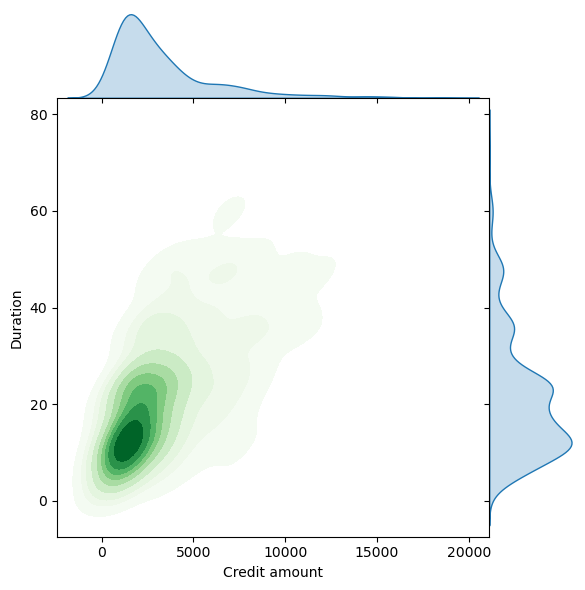

In [32]:
# looking for biggest amount of credit:
sns.jointplot(x="Credit amount", y="Duration", data=df, kind="kde", space=0, cmap="Greens", fill= True, height=6)
plt.show()

Number of credits by purpose:                Purpose  Count
1                  car    337
5             radio/TV    280
4  furniture/equipment    181
0             business     97
3            education     59
6              repairs     22
2  domestic appliances     12
7      vacation/others     12


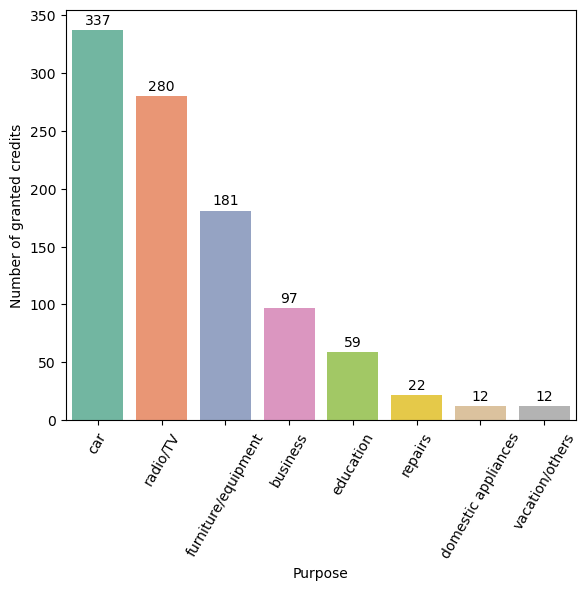

In [53]:
# grouping propose by age:
n_credits = df.groupby("Purpose")["Age"].count().rename("Count").reset_index().sort_values(by=["Count"], ascending=False)
print(f"Number of credits by purpose: {n_credits}")

plt.figure(figsize=(6,6))
bar = sns.barplot(x="Purpose",y="Count",data= n_credits, palette='Set2')
bar.set_xticklabels(bar.get_xticklabels(), rotation=60, fontsize=10)

for container in bar.containers:
    bar.bar_label(container, padding=2)
    
plt.ylabel("Number of granted credits", fontsize=10)
plt.tight_layout()

The barplot above shows how many credits were granted for various purposes. Most of credits were granted for car and radio/TV.

# Detailed analysis of categorical variable:

In [60]:
def boxes(x,y,h,r=45, pal='husl'):
    fig, ax = plt.subplots(figsize=(8,6))
    box = sns.boxplot(x=x,y=y, hue=h, palette=pal, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

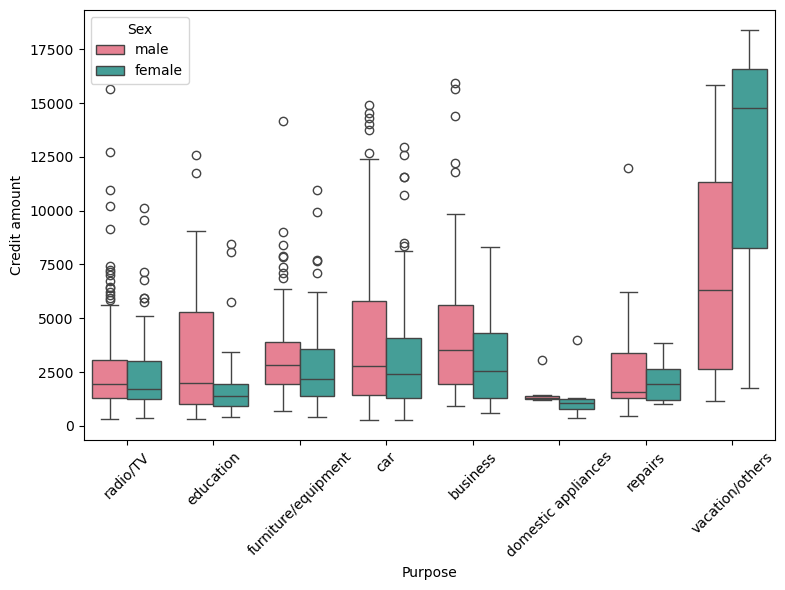

In [61]:
boxes("Purpose","Credit amount","Sex")

The plot above shows that the biggest amounts are taken for vacations/others, the smallest for domestic appliances. Most of them have outliers on the upper side of the boxes (higher amounts). In most of the cases there is no difference between men and women, despite category vacation/others. But one must remember that there was very little number of credits granted in this category.



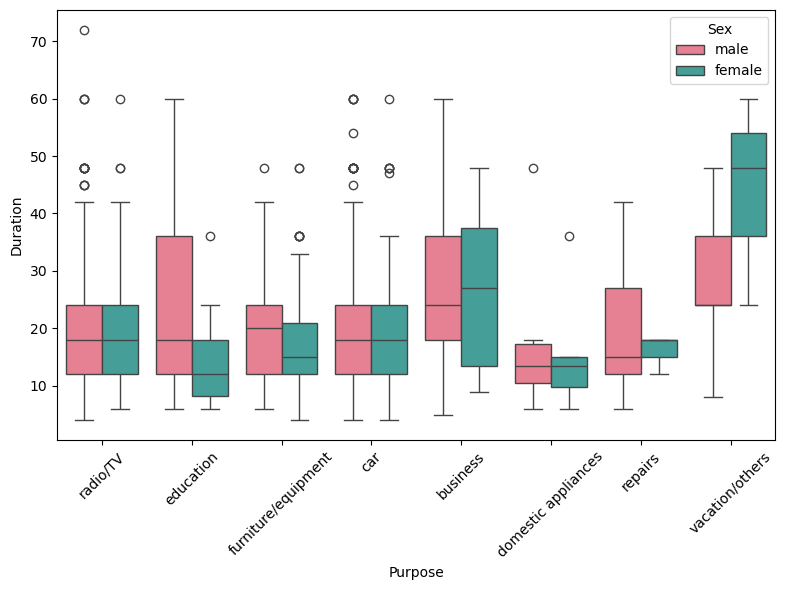

In [62]:
boxes("Purpose","Duration","Sex")

The boxplot above indicates that generally there is no difference in credit duration between men and women. We can’t see also clear trend between categories with observations that the shortest duration is for domestic appliances. It makes sense as it is in agreement with insights from the previous graph (credit amount) – in this category, there are the lowest amounts of credits.

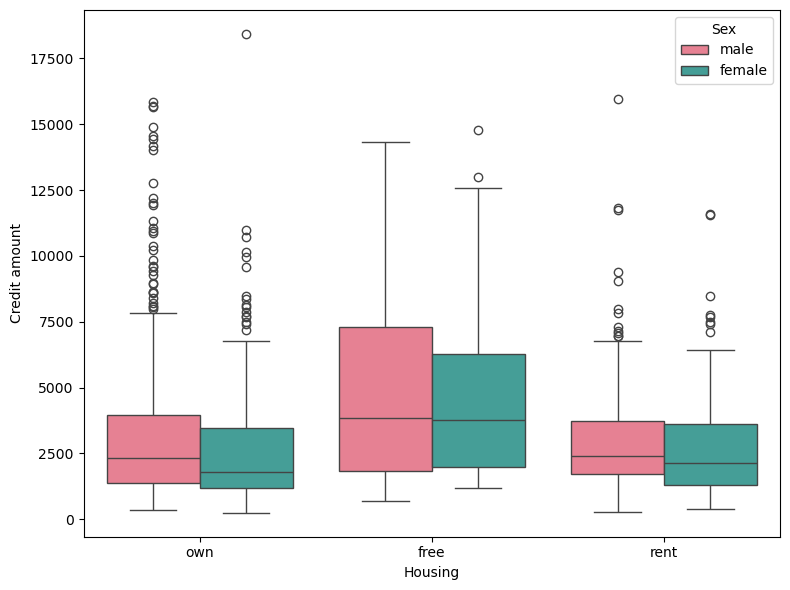

In [63]:
boxes("Housing","Credit amount","Sex",r=0)


In terms of housing category, there is no big difference despite people having “free” housing tend to take slightly bigger credit amounts.

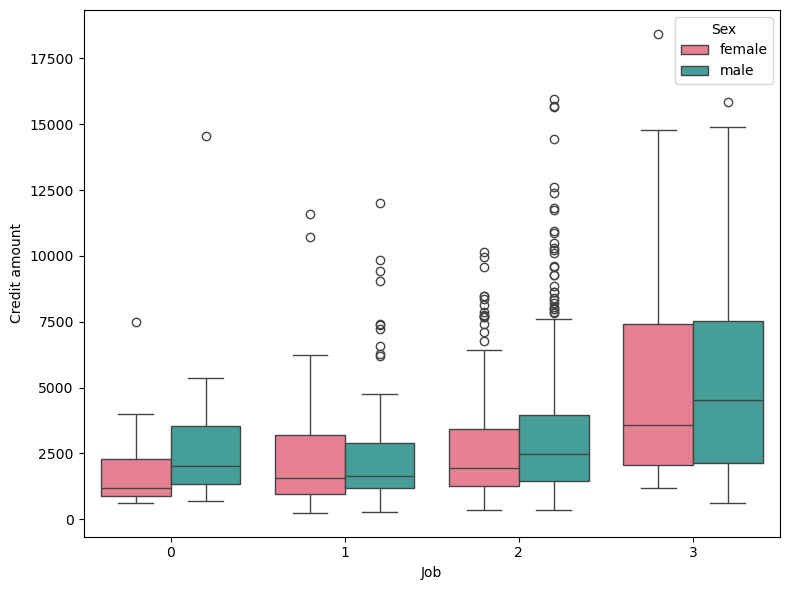

In [64]:
boxes("Job","Credit amount","Sex",r=0)

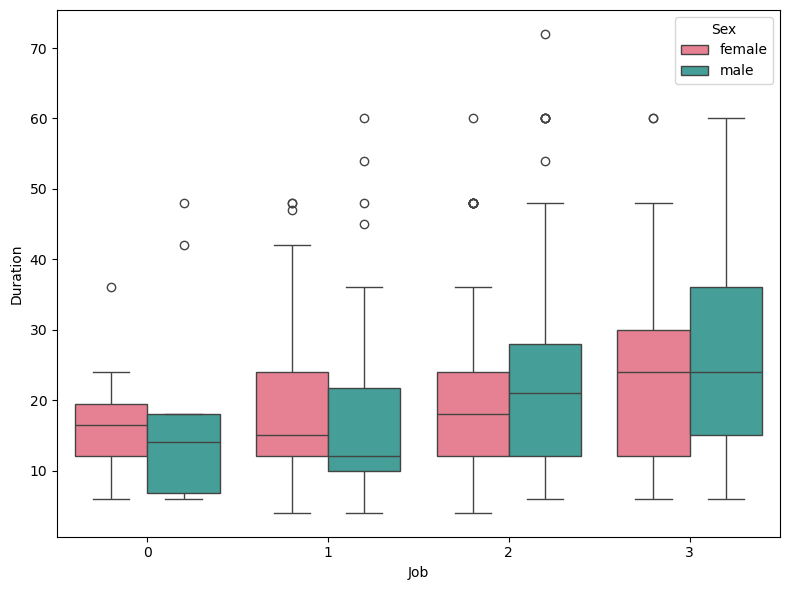

In [65]:
boxes("Job","Duration","Sex",r=0)

Text(0.5, 0, 'Age')

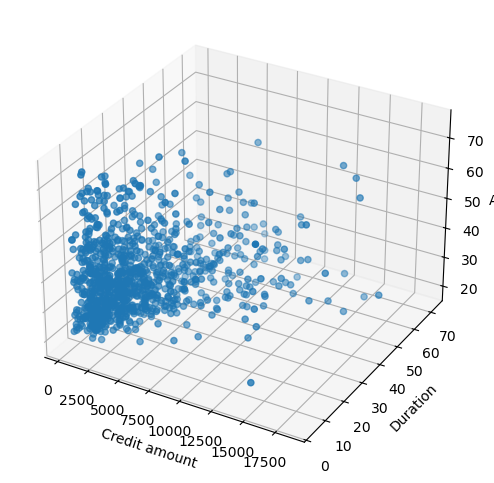

In [68]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Credit amount"], df["Duration"], df["Age"])
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

In [69]:
#Selecting columns for clusterisation with k-means
selected_cols = ["Age","Credit amount", "Duration"]
cluster_data = df.loc[:,selected_cols]

In [71]:
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(7,7))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    plt.tight_layout()

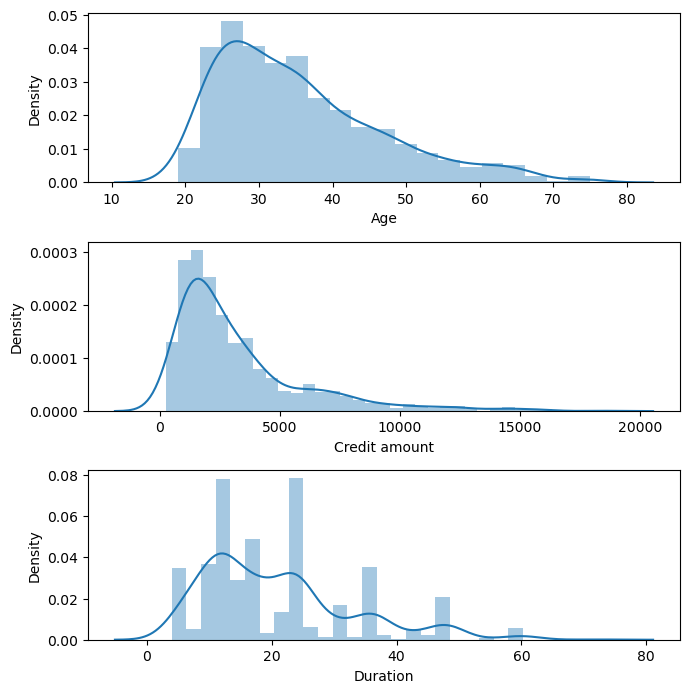

In [72]:
distributions(cluster_data)

We can see that distributions are right-skewed. To obtain better results we should remove the skewness by logarithmic transformation. After that let's see how they look like.

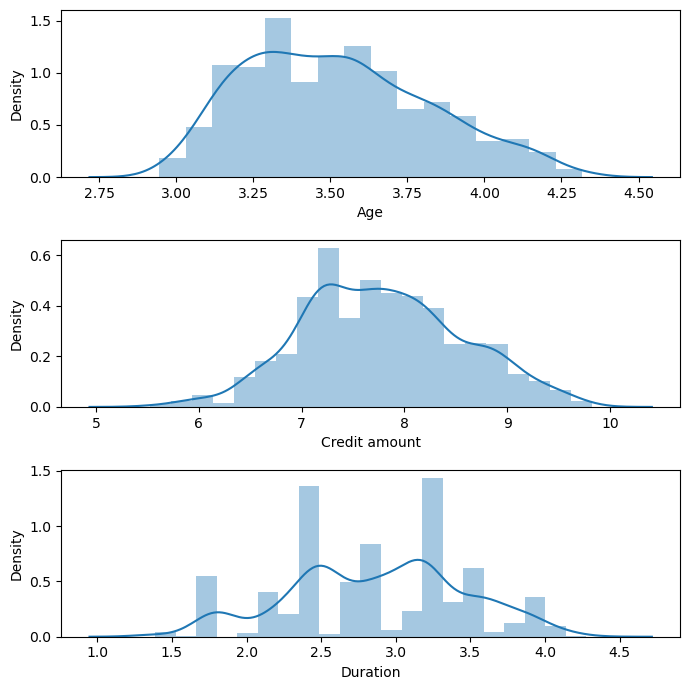

In [73]:
cluster_log = np.log(cluster_data)
distributions(cluster_log)